### Objetivo:
* **Promover o uso do algoritmo de aprendizado não supervisionado K-means, aplicado à base de dados Iris;** 

* **Avaliar o desempenho do algoritmo em diferentes situações, utilizando** <br><br>
    * **os próprios rótulos para as instâncias da base de dados Iris;**<br>
    * **o cálculo de 2 métricas de avaliação: os índices Silhueta e Calinski-Harabasz.**

In [1]:
# Importação de algumas bibliotecas e módulo dataset que contém alguns conjuntos de dados

from sklearn import datasets as ds
from sklearn.cluster import KMeans # importação do módulo KMeans da biblioteca SciKit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as mpl
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score, calinski_harabasz_score # Importa a métrica de silhueta e Calinski-Harabasz

## Avaliação e pré-processamento dos dados

In [2]:
# carrega o conjunto de dados Iris
iris = ds.load_iris()

In [3]:
# Todas os atributos da base de dados
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Exibe as 5 primeiras instâncias da base de dados Iris
iris['data'][0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# Rótulos do atributo alvo
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Todos os valores distintos para os rótulos das instâncias
np.unique(iris['target'])

array([0, 1, 2])

In [7]:
# Nomes atribuídos a cada um dos rótulos
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# Substitui os rótulos numéricos para os seus respectivos nomes
target_nomeado = iris['target_names'][iris['target']]
target_nomeado

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [9]:
# Nomes das colunas associados aos atributos previsores do conjunto de dados
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# Junta os dados dos atributos previsores com os dados do atributo alvo
iris2 = np.concatenate((iris['data'], target_nomeado.reshape(1, -1).T), axis = 1)

In [11]:
# Junta, em uma lista, os nomes das colunas dos atributos previsores com o nome da coluna do atributo alvo
columns = iris['feature_names'] + ['specie']

In [12]:
# Exibe a lista columns
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'specie']

In [13]:
# Cria um DataFrame a partir do objeto íris2 e da lista columns
df = pd.DataFrame(data = iris2, columns = columns)

In [14]:
# Verifica os tipos de dados de cada atributo
df.dtypes

sepal length (cm)    object
sepal width (cm)     object
petal length (cm)    object
petal width (cm)     object
specie               object
dtype: object

In [15]:
# Converte o tipo dos dados dos atributos (exceto specie) para float 
df[columns[:-1]] = df[columns[:-1]].astype(float)  

In [16]:
# Verifica os tipos de dados de cada atributo
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
specie                object
dtype: object

In [17]:
# Exibe as 5 primeiras instâncias do dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


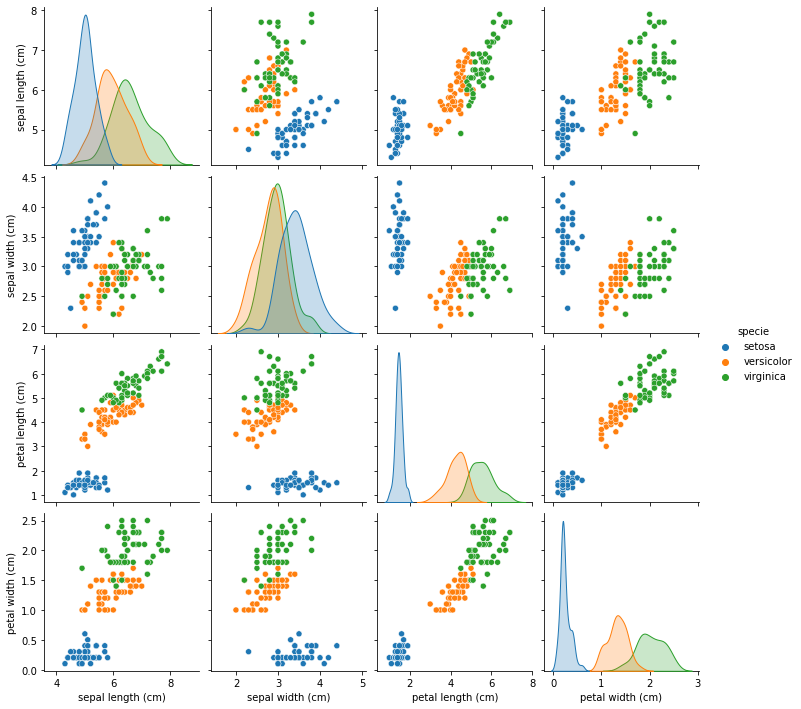

In [18]:
# Gráfico de pares de colunas
sns.pairplot(data=df, hue='specie');

**Para fins de exemplo e facilitar a visualização gráfica, optou-se por escolher uma combinação de 2 atributos (atributos sepal length e petal width) por essa combinação relacionar características diferentes e aparentar uma distribuição com boa separação das espécies**.

**Além disso, como cada instância da base de dados já está rotulada com uma das 3 possibilidades (setosa, versicolor e virginica), pode-se separar as instâncias em 3 grupos e, por isso, é fácil determinar que o valor ideal de k para o agrupamento será de k = 3. O desempenho do algoritmo K-means será comparado, graficamente, com os dados rotulados da base de dados.**

In [19]:
# Novo dataframe com apenas a combinação de atributos desejada
df_SL_PW = df[['sepal length (cm)', 'petal width (cm)', 'specie']]

In [20]:
# Exibe as 3 primeiras instâncias do novo dataframe
df_SL_PW.head(3)

,sepal length (cm),petal width (cm),specie
0,5.1,0.2,setosa
1,4.9,0.2,setosa
2,4.7,0.2,setosa


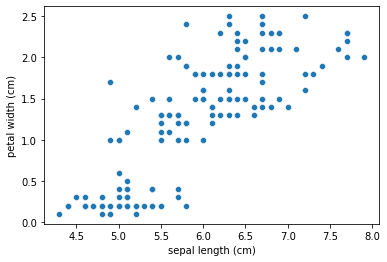

In [21]:
# Distribuição dos dados, segundo o par de características selecionado, mas sem qualquer rótulo que as separe.
sns.scatterplot(data=df_SL_PW, x='sepal length (cm)', y='petal width (cm)');

## Agrupamento para K = 3 e com 2 atributos-alvo: sepal length e petal width

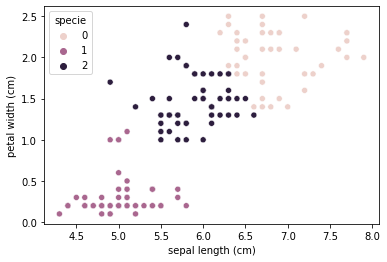

In [22]:
# N° de clusters (grupos)
k = len(np.unique(df['specie'])) # 3 clusters = setosa, versicolor e virginica

# N° de vezes que o algoritmo será executado na íntegra com novos valores iniciais para os centroides.
# Apenas o melhor resultado será selecionado.
n_init = 10

# Quantidade de iterações máximas executadas
max_iter = 300

#Qntd máxima de processamentos em paralelo (foram selecionados todos os núcleos de processamento da máquina local - PC)
n_jobs = -1 

# Configuração e instanciação do algoritmo
alg = KMeans(init='k-means++', n_clusters = k, random_state=50)

# Treina o modelo K-means
alg.fit(X = df_SL_PW.drop('specie', axis = 1).values)

# Cópia do dataframe df_SL_PW, adicionando a previsão dos rótulos pelo K-means
df_SL_PW_specie_predict = df_SL_PW.copy()
df_SL_PW_specie_predict['specie'] = alg.predict(df_SL_PW.drop('specie', axis = 1).values)

# Gráfico de distribuição com os dados rotulados pelo K-means
sns.scatterplot(data=df_SL_PW_specie_predict, x='sepal length (cm)', y='petal width (cm)', hue = 'specie');

**O gráfico acima serve de base para que os grupos encontrados (grupo 1, 2 e 3) sejam então rotulados pelo usuário. É possível observar que a ordem dos grupos detectada pelo modelo (setosa = 1, versicolor = 2 e virgínica = 0) não é a mesma dos rótulos atrelados a cada espécie (setosa = 0, versicolor = 1 e virgínica = 2), mas é visível qual grupo (cluster) se refere a qual espécie.**

In [23]:
# Traduz o que siginifica cada índice previsto nos agrupamentos do K-means
dict_traducao = { 0: 'virginica', 1: 'setosa', 2: 'versicolor'}
df_SL_PW_specie_predict['specie'] = [dict_traducao[s] for s in df_SL_PW_specie_predict['specie']]

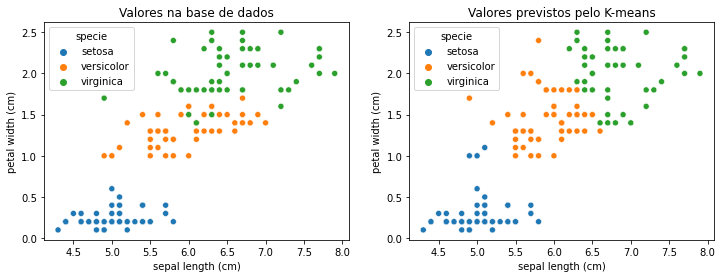

In [24]:
# Exibe 2 scatterplots: scatterplot à esquerda com agrupamentos dos valores observados e 
# à direita com agrupamentos dos valores previstos pelo K-means

fig, axes = mpl.subplots(1, 2, figsize=(12,4))
fig1 = sns.scatterplot(data = df_SL_PW.sort_values(by = 'specie', ascending=True), 
                       x='sepal length (cm)', y='petal width (cm)', hue = 'specie', ax = axes[0])

axes[0].set_title('Valores na base de dados')

fig2 = sns.scatterplot(data = df_SL_PW_specie_predict.sort_values(by = 'specie', ascending=True), 
                       x='sepal length (cm)', y='petal width (cm)', hue = 'specie', ax = axes[1])

axes[1].set_title('Valores previstos pelo K-means');

**A figura acima faz o comparativo entre os grupos originais (à esquerda) e os previstos pelo k-means
(à direita).**

**Uma rápida observação denuncia que há instâncias agrupadas em grupos diferentes. Isso acontece entre as espécies virgínica e versicolor. As flores que, originalmente, eram classificadas como virgínica, mas que apresentavam características de comprimento de sépala e largura de pétala que as inseriram dentro do grupo da espécie versicolor, não puderam ser agrupadas de modo correto pelo algoritmo de K-means devido a essa sobreposição na distribuição das instâncias.**

In [25]:
# Total de instância classificadas de forma errada pelo algoritmo K-means
len(df_SL_PW_specie_predict[df_SL_PW['specie'] != df_SL_PW_specie_predict['specie']])

26

In [26]:
# Cria uma matriz de confusão entre os rótulos reais e os previstos
cm = confusion_matrix(df_SL_PW['specie'], df_SL_PW_specie_predict['specie'])
cm

array([[50,  0,  0],
       [ 4, 39,  7],
       [ 0, 15, 35]], dtype=int64)

In [27]:
# Organiza a matriz de confusão em um dataframe
cmtx = pd.DataFrame(cm, index = 'Real: ' + pd.DataFrame(iris['target_names'])[0], 
                    columns = 'Prev: ' + pd.DataFrame(iris['target_names'])[0])

cmtx

,Prev: setosa,Prev: versicolor,Prev: virginica
0,,,
Real: setosa,50,0,0
Real: versicolor,4,39,7
Real: virginica,0,15,35


**Observa-se que houve 26 erros de clasificações feitas pelo algoritmo K-means contra 124 classificações corretas.**

In [28]:
# Métrica de avaliação entre o observado e o previsto
# accuracy_score = total de previsões feitas CORRETAMENTE / total de previsões (corretas + incorretas)
accuracy_score(df_SL_PW['specie'], df_SL_PW_specie_predict['specie'])

0.8266666666666667

**É importante frisar que a matriz de confusão, a quantidade de erros (26 instâncias) e o percentual de acertos (82,7%) só podem ser obtidos, nesse caso do uso do K-means, porque os rótulos corretos de cada espécie são conhecidos no banco de dados Iris da biblioteca SciKit-Learn (setosa, versicolor e virginica).**
<br><br>
**Outras métricas devem ser utilizadas nas situações em que os rótulos originais não são conhecidos.** 
<br><br>
**No exemplo, a seguir, é calculada a silhueta média dos clusters (grupos), uma das métricas mais utilizadas na avaliação de agrupamentos pelo K-means. A silhueta busca por grupos que possuam pouca ou nenhuma sobreposição.**
<br><br>
**A silhueta é um índice que varia de –1 a 1. Quanto mais baixo esse número (próximo de -1), maior a quantidade de instâncias que poderiam ser agrupadas em outro cluster (foram agrupadas de forma errada).**

## Agrupamento para K = 3 e com os 4 atributos-alvo: sepal length, sepal width, petal length e petal width

In [29]:
# Cria um dataframe com todos os atributos previsores e atributo alvo
data = np.concatenate((iris['data'], iris['target'].reshape(1, -1).T), axis = 1)
columns = iris['feature_names'] + ['specie']
dataframe = pd.DataFrame(data = data, columns = columns)

In [30]:
dataframe.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


**A seguir, é utilizada uma métrica de avaliação para agrupamentos feitos pelo algoritmo K-means denominada <font color='red'>silhueta</font>.**
<br><br>
**A silhueta é uma métrica que avalia o quanto uma instância está adequadamente vinculada a um cluster.**<br><br>
**A medida de silhueta avalia os valores de distância média de uma instância para as outras instâncias parceiras de cluster.**<br><br> 
**Além disso, essa métrica de avaliação utiliza a menor distância da mesma instância avaliada para os demais clusters a fim de analisar tanto as instâncias individualmente quanto a totalidade dos clusters em si.**
<br><br>
* **Os valores de silhueta variam de –1 a 1. Quanto mais próximo de -1, maior a quantidade de instâncias que poderiam ser agrupadas em outro cluster;**
* **Silhueta = - 1 --> Diversas instâncias poderiam estar vinculadas a outro cluster;**
* **Silhueta = 1 --> Diversas instâncias estão associadas ao cluster certo / ideal.** 

In [31]:
# n° de clusters (grupos)
k = 3 # 3 clusters = setosa, versicolor e virginica

# N° de vezes que o algoritmo será executado na íntegra com novos valores iniciais para os centroides.
# Apenas o melhor resultado será selecionado.
n_init = 10

# Quantidade de iterações máximas executadas
max_iter = 300

n_jobs = -1 # Qntd máxima de processamentos em paralelo (foram selecionados todos os núcleos de processamento do PC)

# Configuração e instanciação do algoritmo
alg = KMeans(init='k-means++', n_clusters = k, random_state=50)

# Treina o modelo k-means
alg.fit(X = dataframe.iloc[:, 0:4].values)

# Faz os agrupamentos, prevendo os rótulos
prevs = alg.predict(X = dataframe.iloc[:, 0:4].values)

# Calcula a silhueta
print('Índice Silhueta: ', silhouette_score(dataframe.iloc[:, 0:4].values, prevs))

Índice Silhueta:  0.5528190123564094


**O valor 0.55 pode ser considerado um resultado muito bom para um índice que varia de -1 a 1**<br><br>
**A seguir, uma outra métrica de avaliação para agrupamentos feitos pelo algoritmo K-means denominada <font color='red'>Calinski-Harabasz</font> é utilizada.**
<br><br>
**O índice Calinski-Harabasz é uma métrica que calcula e avalia a taxa de dispersão entre os clusters pela dispersão entre os membros (instâncias) de cada um deles.**<br><br>
**Quanto maior for o valor para o índice de Calinski-Harabasz, melhor será o agrupamento. No entanto, esse valor faz mais sentido quando comparado com outros valores para esse mesmo índice, referentes aos diferentes agrupamentos (diferentes valores de k), ajudando a determinar qual é o melhor K dentre todos e, portanto, o agrupamento mais eficiente.**

In [32]:
# Índice Calinski-Harabasz - calculada, usando os 4 atributos previsores e os rótulos previstos
print('Índice Calinski-Harabasz: ', calinski_harabasz_score(dataframe.iloc[:, 0:4].values, prevs))

Índice Calinski-Harabasz:  561.62775662962


## Agrupamento para diferentes k's e com os 4 atributos-alvo

<br>**Alguns testes são feitos a seguir, utilizando diferentes valores para k para avaliar os valores fornecidos pelas métricas de silhueta e Calinski-Harabasz.**<br><br>

In [33]:
# N° de vezes que o algoritmo será executado na íntegra com novos valores iniciais para os centroides.
# Apenas o melhor resultado será selecionado.
n_init = 10

# Quantidade de iterações máximas executadas
max_iter = 300

n_jobs = -1 # Qntd máxima de processamentos em paralelo (foram selecionados todos os núcleos de processamento do PC)

for k in range(2, 7):
    
    # Configuração e instanciação do algoritmo
    alg = KMeans(init='k-means++', n_clusters = k, random_state=50)
    
    # Treina o modelo K-means
    alg.fit(X = dataframe.iloc[:, 0:4].values)

    # Faz os agrupamentos
    prevs = alg.predict(X = dataframe.iloc[:, 0:4].values)
    
    # Exibe o valor de K selecionado pelo looping for
    print('Para k = ', k)
    
    # Calcula a silhueta - calculada, usando os atributos previsores e os rótulos previstos
    print('Índice Silhueta: ', silhouette_score(dataframe.iloc[:, 0:4].values, prevs))
    
    # Calcula o índice Calinski-Harabasz - calculada, usando os atributos previsores e os rótulos previstos
    print('Índice Calinski-Harabasz: ', calinski_harabasz_score(dataframe.iloc[:, 0:4].values, prevs))
    
    print()

Para k =  2
Índice Silhueta:  0.6810461692117462
Índice Calinski-Harabasz:  513.9245459802768

Para k =  3
Índice Silhueta:  0.5528190123564094
Índice Calinski-Harabasz:  561.62775662962

Para k =  4
Índice Silhueta:  0.49805050499728726
Índice Calinski-Harabasz:  530.7658081872851

Para k =  5
Índice Silhueta:  0.4887488870931054
Índice Calinski-Harabasz:  495.54148767768777

Para k =  6
Índice Silhueta:  0.36483400396700244
Índice Calinski-Harabasz:  473.8506068330425



**Observe que o melhor conjunto de índices é para o k = 3, onde**

**Índice Silhueta = 0.5528190123564094**<br>
**Índice Calinski-Harabasz = 561.62775662962**
    
**O n° de clusters k = 2 gera o maior valor de silhueta, porém quando k = 3, o índice Calinski-Harabasz apresenta o maior valor dentre todas as possibilidades (entre k = 2 e k = 6), juntamente com um valor ainda satisfatório para a silhueta.**

**<font color='red'>Conclusão</font>**: **K = 3 é o melhor valor para agrupar os dados da base de dados Iris, como já se sabia desde o início.**